<a href="https://colab.research.google.com/github/Tom-Lennox/Kaggle/blob/master/HousePrices_c01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# title

In [0]:
# kaggle APIセット
!pip install kaggle

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
# 「Download 100%.」と表示で成功。

# [kaggle.json]を持参する。
from google.colab import drive
drive.mount('/content/drive')

# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
!kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

Download 100%.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, s

In [0]:
# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
# !kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 9.82MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 32.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.6MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.7MB/s]
data_description.txt  sample_submission.csv  test.csv  train.csv


The size of train is : (1460, 82)
The size of test is : (1459, 82)
歪度: 1.882876
尖度: 6.536282


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0, 0.5, 'SalePrice')

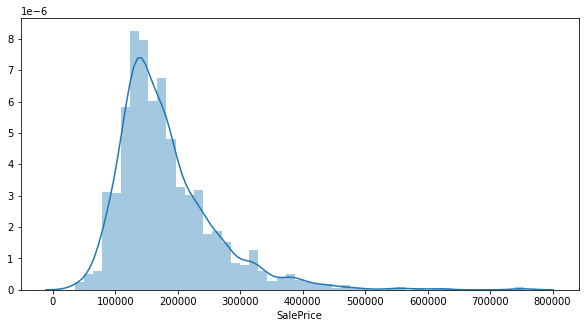

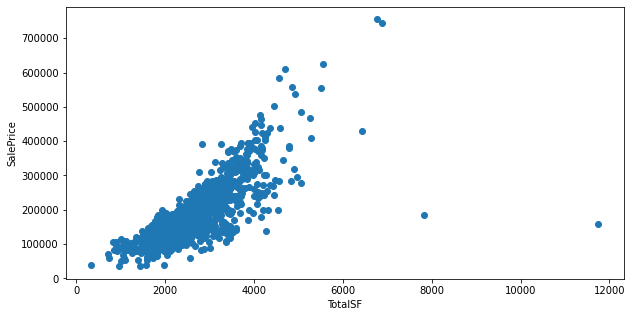

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# とりあえずファイルを読み込む
train = pd.read_csv("/content/house-prices/train.csv")
test = pd.read_csv("/content/house-prices/test.csv")

# 
# 配列の大きさを確認したい。
train['WhatIsData'] = 'Train'
test['WhatIsData'] = 'Test'
test['SalePrice'] = 9999999999
alldata = pd.concat([train,test],axis=0).reset_index(drop=True)
print('The size of train is : ' + str(train.shape))
print('The size of test is : ' + str(test.shape))
# 

train["SalePrice"].describe()
# mean, 50%等見て正規分布か確認。
# 下記で良いのでは？

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# .
# グラフ描画
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
# 

# .
# 歪度と尖度を計算
print("歪度: %f" % train['SalePrice'].skew())
print("尖度: %f" % train['SalePrice'].kurt())
# 

test_x = pd.read_csv("/content/house-prices/test.csv")
#物件の広さを合計した変数を作成
train["TotalSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test_x["TotalSF"] = test_x["1stFlrSF"] + test_x["2ndFlrSF"] + test_x["TotalBsmtSF"]

# 散布図
# // なぜ散布図なのか？等の疑問を持つべき。
plt.figure(figsize=(10, 5))
plt.scatter(train["TotalSF"],train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
# 

In [16]:
train["TotalSF"]
# train["SalePrice"]

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSF, Length: 1460, dtype: int64

(array([0.00068493, 0.01643836, 0.02534247, 0.13767123, 0.19726027,
        0.19794521, 0.17123288, 0.11369863, 0.07191781, 0.03150685,
        0.01986301, 0.00753425, 0.00410959, 0.00136986, 0.        ,
        0.        , 0.00136986, 0.00068493, 0.        , 0.00068493,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00068493]),
 array([  334. ,   714.6,  1095.2,  1475.8,  1856.4,  2237. ,  2617.6,
         2998.2,  3378.8,  3759.4,  4140. ,  4520.6,  4901.2,  5281.8,
         5662.4,  6043. ,  6423.6,  6804.2,  7184.8,  7565.4,  7946. ,
         8326.6,  8707.2,  9087.8,  9468.4,  9849. , 10229.6, 10610.2,
        10990.8, 11371.4, 11752. ]),
 <a list of 30 Patch objects>)

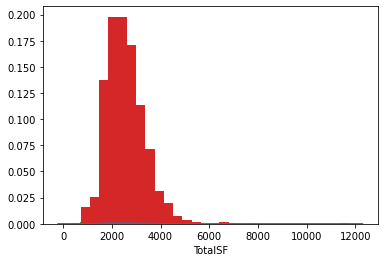

In [21]:
# グラフ
sns.distplot(train['TotalSF'])
train["SalePrice"]

data = train['TotalSF']
# 【閑話】distplotで確率を求めたい場合（I mean デフォルトでy軸何表しているのかわからん。）
sns.distplot(data, kde=False, norm_hist=True, bins=100)

weights = np.ones_like(np.array(data))/float(len(np.array(data)))
plt.hist(data, weights=weights, bins = 100)

# l = [1, 3, 2, 1, 3]
l = data
weights = np.ones_like(np.array(l))/float(len(np.array(l)))
plt.hist(l, weights=weights, bins = 30)
# https://www.it-swarm.dev/ja/python/seaborn-distplotのy軸とは何ですか？/805905292/